In [42]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from src.genome import Genome
from src.topology import build_topology_and_weights
from src.draw import draw
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
data = json.load(open('results/slimevolley_history_500.json'))
df = pd.DataFrame(data['history'])
df.head()

,generation,best_fitness,avg_fitness,num_species,mean_parameters,best_genome
0,0,-3.6875,-5.333496,0,39.000000,"{'nodes': {'0': {'id': 0, 'type': 0, 'level': ..."
1,1,-4.4375,-5.347656,1,39.023438,"{'nodes': {'0': {'id': 0, 'type': 0, 'level': ..."
2,2,-4.0000,-5.300293,1,39.078125,"{'nodes': {'0': {'id': 0, 'type': 0, 'level': ..."
3,3,-4.0000,-5.264160,1,39.140625,"{'nodes': {'0': {'id': 0, 'type': 0, 'level': ..."
4,4,-4.2500,-5.116211,1,39.062500,"{'nodes': {'0': {'id': 0, 'type': 0, 'level': ..."


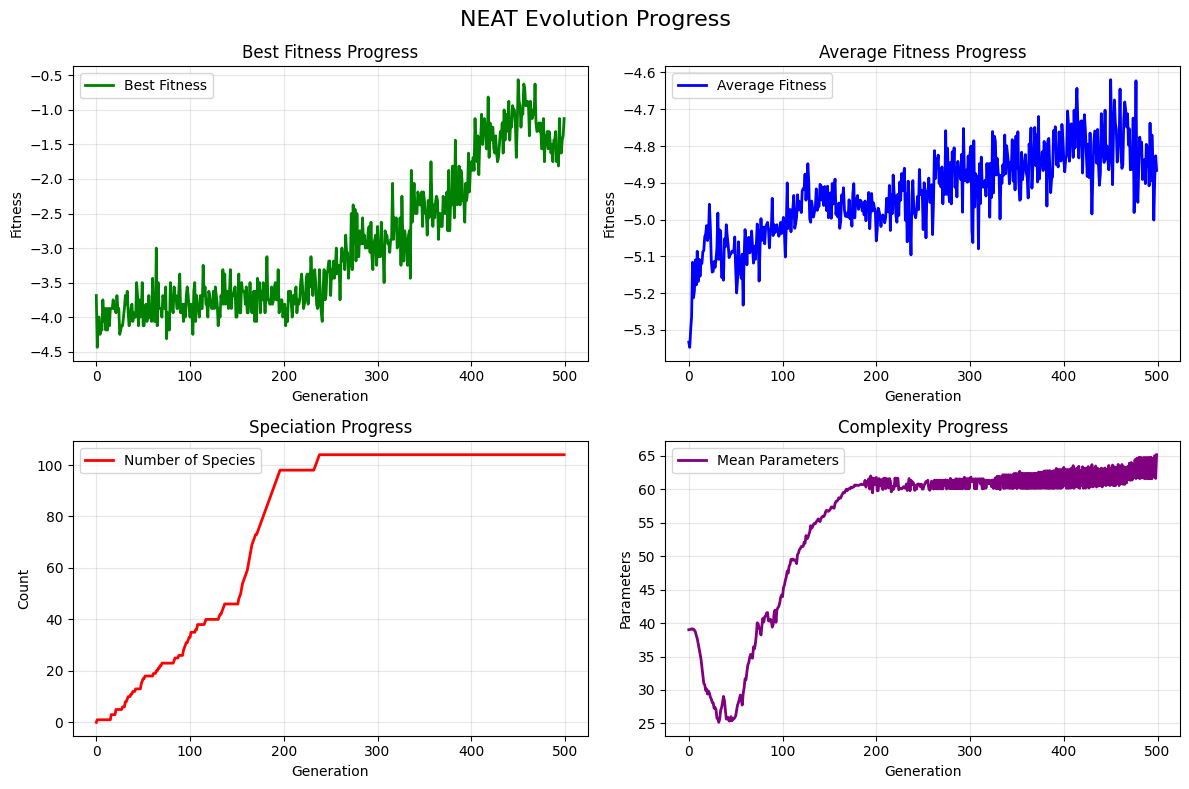

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('NEAT Evolution Progress', fontsize=16)

# Best fitness over time
ax1.plot(df['generation'], df['best_fitness'], 'g-', linewidth=2, label='Best Fitness')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness')
ax1.set_title('Best Fitness Progress')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Average fitness over time
ax2.plot(df['generation'], df['avg_fitness'], 'b-', linewidth=2, label='Average Fitness')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Fitness')
ax2.set_title('Average Fitness Progress')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Number of species over time
ax3.plot(df['generation'], df['num_species'], 'r-', linewidth=2, label='Number of Species')
ax3.set_xlabel('Generation')
ax3.set_ylabel('Count')
ax3.set_title('Speciation Progress')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Mean parameters over time
ax4.plot(df['generation'], df['mean_parameters'], 'purple', linewidth=2, label='Mean Parameters')
ax4.set_xlabel('Generation')
ax4.set_ylabel('Parameters')
ax4.set_title('Complexity Progress')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()



In [77]:
# Plot the evolution
from src.draw import plot_evolution

# Extract genomes from the first N generations
num_gens_to_plot = 50
genomes = []
for i in range(min(num_gens_to_plot, len(df))):
    row = df.iloc[i]
    genome = Genome.from_dict(dict(row['best_genome']))
    genomes.append(genome)

# Generate aligned plots - all networks will have the same layout
save_paths = [f'results/plots/aligned_genome_{i}.png' for i in range(len(genomes))]
plot_evolution(genomes, save_paths=save_paths, draw_node_labels=False)

print(f"Generated {len(genomes)} aligned genome visualizations")


Genome 0 visualization saved to results/plots/aligned_genome_0.png
Genome 1 visualization saved to results/plots/aligned_genome_1.png
Genome 2 visualization saved to results/plots/aligned_genome_2.png
Genome 3 visualization saved to results/plots/aligned_genome_3.png
Genome 4 visualization saved to results/plots/aligned_genome_4.png
Genome 5 visualization saved to results/plots/aligned_genome_5.png
Genome 6 visualization saved to results/plots/aligned_genome_6.png
Genome 7 visualization saved to results/plots/aligned_genome_7.png
Genome 8 visualization saved to results/plots/aligned_genome_8.png
Genome 9 visualization saved to results/plots/aligned_genome_9.png
Genome 10 visualization saved to results/plots/aligned_genome_10.png
Genome 11 visualization saved to results/plots/aligned_genome_11.png
Genome 12 visualization saved to results/plots/aligned_genome_12.png
Genome 13 visualization saved to results/plots/aligned_genome_13.png
Genome 14 visualization saved to results/plots/aligned

In [78]:
from PIL import Image
import glob
import os

def create_gif_from_plots(output_path='evolution.gif', duration=200):
    # Get all PNG files in plots directory, sorted by filename
    image_files = sorted(glob.glob('results/plots/*.png'))[:50]
    # Load images
    images = [Image.open(img) for img in image_files]
    
    # Save as GIF
    images[0].save(
        output_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,  # milliseconds per frame
        loop=0
    )
    
    print(f"GIF saved as {output_path}")

create_gif_from_plots()

GIF saved as evolution.gif
